*Rendimiento de Muestra: Polinomio Interpolador*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp






print("T:",T)
print("R:",R)


T: [150. 160. 170. 180. 190. 200. 210.]
R: [35.5 37.8 43.6 45.7 47.3 50.1 51.2]


In [2]:
#@title Polinomio
# Usar solo los puntos más cercanos para mejor estabilidad (150, 160, 170, 180)


grado = len(T_red) - 1
coef = np.polyfit(T_red, R_red, grado)
p = np.poly1d(coef)


print(f"Coeficientes del polinomio (grado {grado}) — orden descendente (x^{grado} ... x^0):\n")
print(coef)



#Mostrar el polinomio explícito con potencias de 'x'
terminos = [] #Lista que acumula los términos del polinomio
for i,c in enumerate(coef):
  exp = grado - i
  c_fmt = f"{c:0.6e}"
  if exp == 0:
    terminos.append(f"{c_fmt}")

  else:
    terminos.append(f"{c_fmt}.x^{exp}")

polinomio_texto = "+".join(terminos)

print("\n Polinomio Interpolador Explícito:")
print(f"p(x)={polinomio_texto}")

print("\n Forma Compacta (np.poly1d):")
print(p)


Coeficientes del polinomio (grado 3) — orden descendente (x^3 ... x^0):

[-1.2000e-03  5.9350e-01 -9.7235e+01  5.3170e+03]

 Polinomio Interpolador Explícito:
p(x)=-1.200000e-03.x^3+5.935000e-01.x^2+-9.723500e+01.x+5.317000e+03

 Forma Compacta (np.poly1d):
         3          2
-0.0012 x + 0.5935 x - 97.23 x + 5317


In [3]:
#@title Evalución del Rendimiento



#Evalución dentro del rango óptimo
T_trabajo = 175
T_falla = 162

R_trabajo = np.polyval(coef,T_trabajo)
R_falla = np.polyval(coef, T_falla)

#Imprime los resultados Obtenidos
print(f"Rendimiento a {T_trabajo} grados C:{R_trabajo:0.2f}%")
print(f"Rendimiento a {T_falla} grados C:{ R_falla:0.2f}%")

#Condición solicitada: Si la temperatura de trabajo cae a 162◦ C por una averı́a, será el proceso satisfactorio hasta que sea reparada?

if R_min <= R_falla <= R_max:
  print("\n El proceso SI es satisfactorio a 162 grados C")
else:
  print("\n El proceso NO es satisfactorio a 162 grados C ")

Rendimiento a 175 grados C:45.56%
Rendimiento a 162 grados C:38.91%

 El proceso SI es satisfactorio a 162 grados C


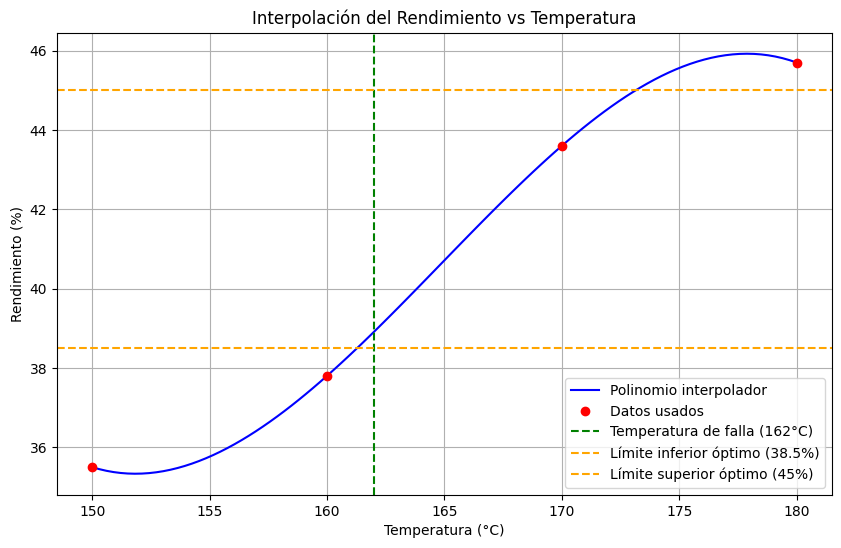

In [4]:
#@title Gráfico
T_plot = np.linspace(150,180,100)
R_plot = p(T_plot)

